
--- pdr.DataReader("NIKKEI225", 'fred', dates[0], dates[-1]) ---
DATE
1949-05-16    176.21
1949-05-17    174.80
1949-05-18    172.53
1949-05-19    171.34
1949-05-20    169.20
Name: NIKKEI225, dtype: float64


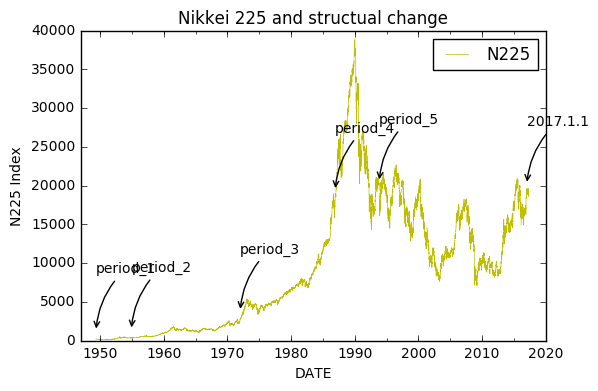

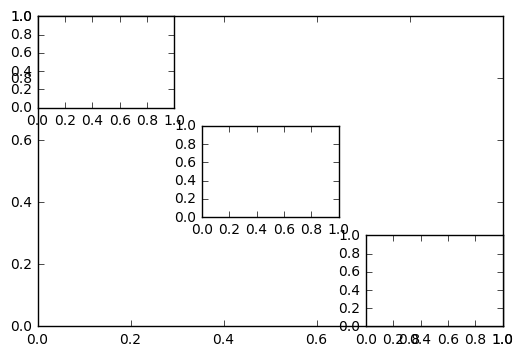

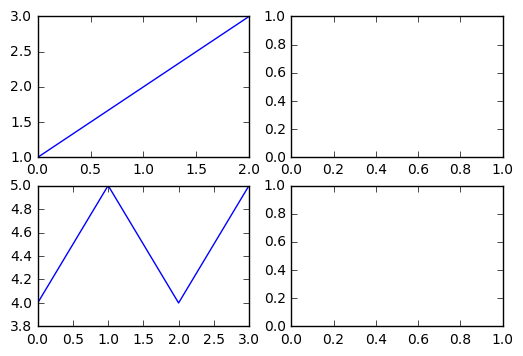

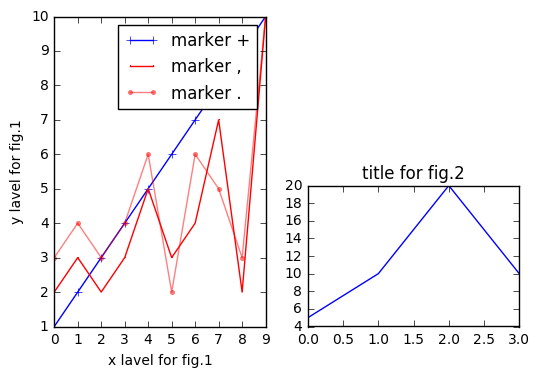

In [2]:
# http://www.geocities.jp/sundayvoyager/trade_cycle.html
# period_1 : 戦後復興期 (19495/16 ～ 1954/11/30)
# period_2 : 高度経済成長期 (19454/12/1 ～ 1971/12/31
# period_3 : 安定成長期 (1972/1/1 ～ 1986/11/30)
# period_4 : バブル経済期 (1986/12/1～1993/10/31)
# period_5 : 経済変革期 (1993/11/1 ～ now)

# 循環期名をリストに
states=['period_1','period_2','period_3','period_4','period_5','Today']
# 期の始点をリストに
dates=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1993/11/1","2017/4/10"]
# 循環期とその始点の配列を、タプルを使って作成
struct_break=[('1949/5/16','period_1'),('1954/12/1','period_2'),('1972/1/1','period_3'),('1986/12/1','period_4'),('1993/11/1','period_5'),('2017/1/1','2017.1.1')]

#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr

#  N225取得
print ('\n--- pdr.DataReader("NIKKEI225", \'fred\', dates[0], dates[-1]) ---')
n225 = pdr.DataReader("NIKKEI225", 'fred', dates[0], dates[-1]).NIKKEI225
print(n225.head(5))

%matplotlib inline
import matplotlib.pyplot as plt

# プロットに必要なウィンドウを取得
fig = plt.figure()

# サブプロットを追加 （1行目、1列、1番）
# add_subplotはAxesオブジェクトを返す。 
# Axesは、グラフの描画、軸のメモリ、ラベルの設定などを設定できる。
g=fig.add_subplot(1,1,1)

# チャートを描画
# ax=g : 描画するサブプロットを指定
# style='y-' : 描画色指定 
# g.legend() : 凡例を付ける
n225.plot(ax=g, style='y-',linewidth=0.5, label='N225')
g.legend()

# 現在アクィブナサブプロットに対して、タイトルを設定
plt.ylabel('N225 Index')
plt.title("Nikkei 225 and structual change")
# サプブロットを指定して、タイトルを設定（上記と同じ結果が得られる）
#g.set_ylabel('N225 Index')
#g.set_title("Nikkei 225 and structual change")

# X軸の範囲を指定
g.set_xlim(['1947/1/1','2020/1/1'])

# 循環期とその始点のタプルの配列でｘ軸を区切る
for date, label in struct_break:
    g.annotate(label,
        xy=(date, n225.asof(date)+1000),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, n225.asof(date)+10000),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )

#----------------------------
# サブプロットの練習 ２
fig2 = plt.figure()
fig2.add_subplot(1, 1, 1)   # 全体に1つサブプロットを追加
fig2.add_subplot(3, 3, 1)   # 3x3の1つめ(左上)
fig2.add_subplot(3, 3, 5)   # 3x3の3つめ(右上)
fig2.add_subplot(3, 3, 9)   # 3x3の8つめ(真ん中下)

#----------------------------
# サブプロットの練習 ３ subplotsもadd_subplot同様Axesオブジェクトを返す
fig3 = plt.figure()
fig3, axes = plt.subplots(2,2)
axes[0][0].plot([1,2,3])
axes[1][0].plot([4,5,4,5])

#----------------------------
# サブプロットの練習 ４
fig4 = plt.figure()
ax1 = plt.subplot(1,2,1)   # 1x2の1番目
ax1.plot([1,2,3,4,5,6,7,8,9,10], marker='+', label='marker +')   # 1番目に描画
ax1.plot([2,3,2,3,5,3,4,7,2,10], color='r', alpha=1, marker=',', label='marker ,')   # 1番目に追加描画 透明度0
ax1.plot([3,4,3,4,6,2,6,5,3,10], color='r', alpha=0.5, marker='.', label='marker .')   # 1番目に追加描画 透明度50%
ax1.set_xlabel('x lavel for fig.1')   # 1番目にxラベルを追加
ax1.set_ylabel('y lavel for fig.1')   # 1番目にyラベルを追加
ax1.legend()
ax4 = plt.subplot(2,2,4)   # 2x2の4番目
ax4.plot([5,10,20,10])   # 4番目に描画
ax4.set_title('title for fig.2')   # 4番目にタイトルを追加
